In [1]:
# Import libraries
import pandas as pd
import matplotlib as plt
%matplotlib inline

In [2]:
# Import data
df_map = pd.read_csv("map.csv")
df_grenades = pd.read_csv("grenades.csv")
df_master = pd.read_csv("master.csv")

In [3]:
# settings to display all columns and rows
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [4]:
df_map.head()

,Unnamed: 0,EndX,EndY,ResX,ResY,StartX,StartY
0,de_cache,3752,3187,1024,1024,-2031,-2240
1,de_cbble,2282,3032,1024,1024,-3819,-3073
2,de_dust2,2127,3455,1024,1024,-2486,-1150
3,de_inferno,2797,3800,1024,1024,-1960,-1062
4,de_mirage,1912,1682,1024,1024,-3217,-3401


In [5]:
df_grenades.head()

,Unnamed: 0,file,map,round,start_seconds,seconds,end_seconds,att_team,vic_team,att_id,vic_id,att_side,vic_side,hp_dmg,arm_dmg,is_bomb_planted,bomb_site,hitbox,nade,winner_team,winner_side,att_rank,vic_rank,att_pos_x,att_pos_y,nade_land_x,nade_land_y,vic_pos_x,vic_pos_y,round_type,ct_eq_val,t_eq_val,avg_match_rank
0,0,003201673717864202280_0171883906.dem,de_dust2,1,109.5534,125.1816,197.6025,Team 2,NaN,76561198244806730,NaN,Terrorist,NaN,0,0,False,NaN,NaN,Decoy,Team 1,CounterTerrorist,13,NaN,-918.1018,-856.1255,257.32770,-435.8516,NaN,NaN,PISTOL_ROUND,2950,3850,16.0
1,1,003201673717864202280_0171883906.dem,de_dust2,1,109.5534,139.1844,197.6025,Team 2,NaN,76561198051040004,NaN,Terrorist,NaN,0,0,False,NaN,NaN,Decoy,Team 1,CounterTerrorist,17,NaN,-1310.6070,1145.8650,-1124.67500,1216.9330,NaN,NaN,PISTOL_ROUND,2950,3850,16.0
2,2,003201673717864202280_0171883906.dem,de_dust2,1,109.5534,166.0649,197.6025,Team 2,Team 2,76561198147933469,7.656120e+16,Terrorist,Terrorist,36,0,False,NaN,Generic,HE,Team 1,CounterTerrorist,18,18.0,-180.6393,327.6691,-89.53781,318.2151,-130.1585,304.0313,PISTOL_ROUND,2950,3850,16.0
3,3,003201673717864202280_0171883906.dem,de_dust2,2,197.6025,213.0431,281.2757,Team 1,NaN,76561198051106390,NaN,CounterTerrorist,NaN,0,0,False,NaN,NaN,Smoke,Team 2,Terrorist,16,NaN,151.3117,2304.8010,-431.48370,2126.3900,NaN,NaN,ECO,12400,4700,16.0
4,4,003201673717864202280_0171883906.dem,de_dust2,2,197.6025,220.8572,281.2757,Team 1,NaN,76561198051106390,NaN,CounterTerrorist,NaN,0,0,False,NaN,NaN,HE,Team 2,Terrorist,16,NaN,-1669.9540,2197.1340,-1955.98500,1384.2130,NaN,NaN,ECO,12400,4700,16.0


In [6]:
df_grenades['round'].value_counts()

15    17784
4     16895
7     16649
6     16578
8     16558
10    16489
9     16460
5     16343
14    16285
13    16216
11    16139
12    15977
19    14671
20    14218
21    13764
22    13243
23    12318
3     11575
18    11111
24    11036
25     9879
26     8940
17     8262
2      7847
27     7759
28     6268
29     5067
16     4100
30     3925
1      3742
Name: round, dtype: int64

In [7]:
df_master['round'].value_counts() - df_grenades['round'].value_counts()

1     33719
2     33853
3     28355
4     22065
5     20528
6     19993
7     19378
8     19044
9     19282
10    19736
11    19427
12    19854
13    20176
14    20158
15    18181
16    33572
17    33300
18    27750
19    21662
20    19965
21    18970
22    17396
23    16406
24    15120
25    12968
26    10974
27     9376
28     7569
29     6401
30     4190
Name: round, dtype: int64

In [8]:
round_list = list(df_grenades['round'])
file_list = list(df_grenades['file'])
file = ""
counter = 0;
for (i, item) in enumerate(round_list):
    #print((i, item))
    if (file == file_list[i]):
        counter += 0 if item - round_list[i-1] < 2 else item - round_list[i-1]
        #print("Current counter: ", counter)
        #print("Prev round ", round_list[i-1])
    else:
        file = file_list[i]
        
print("Counter final: ", counter)

Counter final:  491


In [9]:
print("Counter final: ", counter)

Counter final:  491


### Columns to be dropped <br>

<li>"Unnamed: 0": duplicated index</li>
<li>"att_team", "vic_team", "att_side", "vic_side", "is_bomb_planted", "bomb_site", "hitbox", "nade", "winner_team", "nade_land_x","nade_land_y", "round_type": All of these won't be needed to answer our questions</li>

In [10]:
# Drop unused columns - vicrank and attrank???
df_grenades.drop(columns=["Unnamed: 0", "att_team", "vic_team", "att_side", "vic_side", "is_bomb_planted", "bomb_site", "hitbox", "nade", "winner_team", "nade_land_x","nade_land_y", "round_type"], inplace=True)

In [11]:
df_grenades.head()

,file,map,round,start_seconds,seconds,end_seconds,att_id,vic_id,hp_dmg,arm_dmg,winner_side,att_rank,vic_rank,att_pos_x,att_pos_y,vic_pos_x,vic_pos_y,ct_eq_val,t_eq_val,avg_match_rank
0,003201673717864202280_0171883906.dem,de_dust2,1,109.5534,125.1816,197.6025,76561198244806730,NaN,0,0,CounterTerrorist,13,NaN,-918.1018,-856.1255,NaN,NaN,2950,3850,16.0
1,003201673717864202280_0171883906.dem,de_dust2,1,109.5534,139.1844,197.6025,76561198051040004,NaN,0,0,CounterTerrorist,17,NaN,-1310.6070,1145.8650,NaN,NaN,2950,3850,16.0
2,003201673717864202280_0171883906.dem,de_dust2,1,109.5534,166.0649,197.6025,76561198147933469,7.656120e+16,36,0,CounterTerrorist,18,18.0,-180.6393,327.6691,-130.1585,304.0313,2950,3850,16.0
3,003201673717864202280_0171883906.dem,de_dust2,2,197.6025,213.0431,281.2757,76561198051106390,NaN,0,0,Terrorist,16,NaN,151.3117,2304.8010,NaN,NaN,12400,4700,16.0
4,003201673717864202280_0171883906.dem,de_dust2,2,197.6025,220.8572,281.2757,76561198051106390,NaN,0,0,Terrorist,16,NaN,-1669.9540,2197.1340,NaN,NaN,12400,4700,16.0


In [12]:
# Check for null values
df_grenades.isna().sum()

file                   0
map                    0
round                  0
start_seconds          0
seconds                0
end_seconds            0
att_id                 0
vic_id            306858
hp_dmg                 0
arm_dmg                0
winner_side            0
att_rank               0
vic_rank          306858
att_pos_x              0
att_pos_y              0
vic_pos_x         306858
vic_pos_y         306858
ct_eq_val              0
t_eq_val               0
avg_match_rank         0
dtype: int64

In [13]:
df_master.head()

,Unnamed: 0,file,map,date,round,tick,seconds,att_team,vic_team,att_side,vic_side,hp_dmg,arm_dmg,is_bomb_planted,bomb_site,hitbox,wp,wp_type,award,winner_team,winner_side,att_id,att_rank,vic_id,vic_rank,att_pos_x,att_pos_y,vic_pos_x,vic_pos_y,round_type,ct_eq_val,t_eq_val,avg_match_rank
0,0,003201673717864202280_0171883906.dem,de_dust2,09/28/2017 8:44:22 PM,1,8482,133.0582,Team 1,Team 2,CounterTerrorist,Terrorist,100,0,False,NaN,Head,USP,Pistol,300,Team 1,CounterTerrorist,76561198085893650,17,76561198123082770,17,1473.847,1351.358,662.170,772.748,PISTOL_ROUND,2950,3850,16.0
1,1,003201673717864202280_0171883906.dem,de_dust2,09/28/2017 8:44:22 PM,1,8600,134.9023,Team 1,Team 2,CounterTerrorist,Terrorist,25,0,False,NaN,RightLeg,USP,Pistol,300,Team 1,CounterTerrorist,76561198223006752,16,76561198051040004,17,-1211.723,1060.813,-1184.006,1153.343,PISTOL_ROUND,2950,3850,16.0
2,2,003201673717864202280_0171883906.dem,de_dust2,09/28/2017 8:44:22 PM,1,8610,135.0586,Team 2,Team 1,Terrorist,CounterTerrorist,20,0,False,NaN,LeftLeg,Glock,Pistol,300,Team 1,CounterTerrorist,76561198051040004,17,76561198223006752,16,-1153.584,1163.131,-1198.015,1050.423,PISTOL_ROUND,2950,3850,16.0
3,3,003201673717864202280_0171883906.dem,de_dust2,09/28/2017 8:44:22 PM,1,8624,135.2774,Team 1,Team 2,CounterTerrorist,Terrorist,17,8,False,NaN,Chest,USP,Pistol,300,Team 1,CounterTerrorist,76561198223006752,16,76561198051040004,17,-1173.053,1044.365,-1141.785,1190.089,PISTOL_ROUND,2950,3850,16.0
4,4,003201673717864202280_0171883906.dem,de_dust2,09/28/2017 8:44:22 PM,1,8632,135.4024,Team 2,Team 1,Terrorist,CounterTerrorist,12,7,False,NaN,Chest,Glock,Pistol,300,Team 1,CounterTerrorist,76561198051040004,17,76561198223006752,16,-1142.522,1200.967,-1157.690,1050.702,PISTOL_ROUND,2950,3850,16.0


### Columns to be dropped <br>

<li>"Unnamed: 0": duplicated index</li>
<li>"date", "tick", "att_team", "vic_team", "att_side", "vic_side", "is_bomb_planted", "bomb_site", "hitbox", "award", "winner_team", "round_type": All of these won't be needed to answer our questions</li>

In [14]:
# Drop unused columns
df_master.drop(columns=["Unnamed: 0", "date", "tick", "att_team", "vic_team", "att_side", "vic_side", "is_bomb_planted", "bomb_site", "hitbox", "award", "winner_team", "round_type"], inplace=True)

In [15]:
df_master.head()

,file,map,round,seconds,hp_dmg,arm_dmg,wp,wp_type,winner_side,att_id,att_rank,vic_id,vic_rank,att_pos_x,att_pos_y,vic_pos_x,vic_pos_y,ct_eq_val,t_eq_val,avg_match_rank
0,003201673717864202280_0171883906.dem,de_dust2,1,133.0582,100,0,USP,Pistol,CounterTerrorist,76561198085893650,17,76561198123082770,17,1473.847,1351.358,662.170,772.748,2950,3850,16.0
1,003201673717864202280_0171883906.dem,de_dust2,1,134.9023,25,0,USP,Pistol,CounterTerrorist,76561198223006752,16,76561198051040004,17,-1211.723,1060.813,-1184.006,1153.343,2950,3850,16.0
2,003201673717864202280_0171883906.dem,de_dust2,1,135.0586,20,0,Glock,Pistol,CounterTerrorist,76561198051040004,17,76561198223006752,16,-1153.584,1163.131,-1198.015,1050.423,2950,3850,16.0
3,003201673717864202280_0171883906.dem,de_dust2,1,135.2774,17,8,USP,Pistol,CounterTerrorist,76561198223006752,16,76561198051040004,17,-1173.053,1044.365,-1141.785,1190.089,2950,3850,16.0
4,003201673717864202280_0171883906.dem,de_dust2,1,135.4024,12,7,Glock,Pistol,CounterTerrorist,76561198051040004,17,76561198223006752,16,-1142.522,1200.967,-1157.690,1050.702,2950,3850,16.0


In [16]:
# Check for null values
df_master.isna().sum()

file              0
map               0
round             0
seconds           0
hp_dmg            0
arm_dmg           0
wp                0
wp_type           0
winner_side       0
att_id            0
att_rank          0
vic_id            0
vic_rank          0
att_pos_x         0
att_pos_y         0
vic_pos_x         0
vic_pos_y         0
ct_eq_val         0
t_eq_val          0
avg_match_rank    0
dtype: int64

### Merging datasets <br>
An outer merge is used since there are columns that are unique to each dataset

In [17]:
# Merge the grenade and master dfs
df = df_master.merge(df_grenades, how="outer")

In [18]:
df.head()

,file,map,round,seconds,hp_dmg,arm_dmg,wp,wp_type,winner_side,att_id,att_rank,vic_id,vic_rank,att_pos_x,att_pos_y,vic_pos_x,vic_pos_y,ct_eq_val,t_eq_val,avg_match_rank,start_seconds,end_seconds
0,003201673717864202280_0171883906.dem,de_dust2,1,133.0582,100,0,USP,Pistol,CounterTerrorist,76561198085893650,17,7.656120e+16,17.0,1473.847,1351.358,662.170,772.748,2950,3850,16.0,NaN,NaN
1,003201673717864202280_0171883906.dem,de_dust2,1,134.9023,25,0,USP,Pistol,CounterTerrorist,76561198223006752,16,7.656120e+16,17.0,-1211.723,1060.813,-1184.006,1153.343,2950,3850,16.0,NaN,NaN
2,003201673717864202280_0171883906.dem,de_dust2,1,135.0586,20,0,Glock,Pistol,CounterTerrorist,76561198051040004,17,7.656120e+16,16.0,-1153.584,1163.131,-1198.015,1050.423,2950,3850,16.0,NaN,NaN
3,003201673717864202280_0171883906.dem,de_dust2,1,135.2774,17,8,USP,Pistol,CounterTerrorist,76561198223006752,16,7.656120e+16,17.0,-1173.053,1044.365,-1141.785,1190.089,2950,3850,16.0,NaN,NaN
4,003201673717864202280_0171883906.dem,de_dust2,1,135.4024,12,7,Glock,Pistol,CounterTerrorist,76561198051040004,17,7.656120e+16,16.0,-1142.522,1200.967,-1157.690,1050.702,2950,3850,16.0,NaN,NaN


In [19]:
# Checking datatypes
df.dtypes

file               object
map                object
round               int64
seconds           float64
hp_dmg              int64
arm_dmg             int64
wp                 object
wp_type            object
winner_side        object
att_id              int64
att_rank            int64
vic_id            float64
vic_rank          float64
att_pos_x         float64
att_pos_y         float64
vic_pos_x         float64
vic_pos_y         float64
ct_eq_val           int64
t_eq_val            int64
avg_match_rank    float64
start_seconds     float64
end_seconds       float64
dtype: object

In [20]:
df.sort_values(['file', 'round', 'start_seconds', 'seconds'], inplace=True)
df.head(70)

,file,map,round,seconds,hp_dmg,arm_dmg,wp,wp_type,winner_side,att_id,att_rank,vic_id,vic_rank,att_pos_x,att_pos_y,vic_pos_x,vic_pos_y,ct_eq_val,t_eq_val,avg_match_rank,start_seconds,end_seconds
955466,003201673717864202280_0171883906.dem,de_dust2,1,125.1816,0,0,NaN,NaN,CounterTerrorist,76561198244806730,13,NaN,NaN,-918.10180,-856.1255,NaN,NaN,2950,3850,16.0,109.5534,197.6025
955467,003201673717864202280_0171883906.dem,de_dust2,1,139.1844,0,0,NaN,NaN,CounterTerrorist,76561198051040004,17,NaN,NaN,-1310.60700,1145.8650,NaN,NaN,2950,3850,16.0,109.5534,197.6025
955468,003201673717864202280_0171883906.dem,de_dust2,1,166.0649,36,0,NaN,NaN,CounterTerrorist,76561198147933469,18,7.656120e+16,18.0,-180.63930,327.6691,-130.15850,304.0313,2950,3850,16.0,109.5534,197.6025
0,003201673717864202280_0171883906.dem,de_dust2,1,133.0582,100,0,USP,Pistol,CounterTerrorist,76561198085893650,17,7.656120e+16,17.0,1473.84700,1351.3580,662.17000,772.7480,2950,3850,16.0,NaN,NaN
1,003201673717864202280_0171883906.dem,de_dust2,1,134.9023,25,0,USP,Pistol,CounterTerrorist,76561198223006752,16,7.656120e+16,17.0,-1211.72300,1060.8130,-1184.00600,1153.3430,2950,3850,16.0,NaN,NaN
2,003201673717864202280_0171883906.dem,de_dust2,1,135.0586,20,0,Glock,Pistol,CounterTerrorist,76561198051040004,17,7.656120e+16,16.0,-1153.58400,1163.1310,-1198.01500,1050.4230,2950,3850,16.0,NaN,NaN
3,003201673717864202280_0171883906.dem,de_dust2,1,135.2774,17,8,USP,Pistol,CounterTerrorist,76561198223006752,16,7.656120e+16,17.0,-1173.05300,1044.3650,-1141.78500,1190.0890,2950,3850,16.0,NaN,NaN
4,003201673717864202280_0171883906.dem,de_dust2,1,135.4024,12,7,Glock,Pistol,CounterTerrorist,76561198051040004,17,7.656120e+16,16.0,-1142.52200,1200.9670,-1157.69000,1050.7020,2950,3850,16.0,NaN,NaN
5,003201673717864202280_0171883906.dem,de_dust2,1,136.0901,12,7,Glock,Pistol,CounterTerrorist,76561198051040004,17,7.656120e+16,16.0,-1186.30500,1211.9550,-1082.75600,1107.7690,2950,3850,16.0,NaN,NaN
6,003201673717864202280_0171883906.dem,de_dust2,1,136.2463,12,7,Glock,Pistol,CounterTerrorist,76561198051040004,17,7.656120e+16,16.0,-1169.73600,1223.6390,-1071.76300,1121.3460,2950,3850,16.0,NaN,NaN


In [21]:
df['start_seconds_filled'] = df['start_seconds'].fillna(method="ffill")
cols = list(df)
cols.insert(3, cols.pop(cols.index('start_seconds')))
cols.insert(5, cols.pop(cols.index('end_seconds')))
cols.insert(6, cols.pop(cols.index('start_seconds_filled')))
df = df.loc[:,cols]


In [22]:
df.head(70)

,file,map,round,start_seconds,seconds,end_seconds,start_seconds_filled,hp_dmg,arm_dmg,wp,wp_type,winner_side,att_id,att_rank,vic_id,vic_rank,att_pos_x,att_pos_y,vic_pos_x,vic_pos_y,ct_eq_val,t_eq_val,avg_match_rank
955466,003201673717864202280_0171883906.dem,de_dust2,1,109.5534,125.1816,197.6025,109.5534,0,0,NaN,NaN,CounterTerrorist,76561198244806730,13,NaN,NaN,-918.10180,-856.1255,NaN,NaN,2950,3850,16.0
955467,003201673717864202280_0171883906.dem,de_dust2,1,109.5534,139.1844,197.6025,109.5534,0,0,NaN,NaN,CounterTerrorist,76561198051040004,17,NaN,NaN,-1310.60700,1145.8650,NaN,NaN,2950,3850,16.0
955468,003201673717864202280_0171883906.dem,de_dust2,1,109.5534,166.0649,197.6025,109.5534,36,0,NaN,NaN,CounterTerrorist,76561198147933469,18,7.656120e+16,18.0,-180.63930,327.6691,-130.15850,304.0313,2950,3850,16.0
0,003201673717864202280_0171883906.dem,de_dust2,1,NaN,133.0582,NaN,109.5534,100,0,USP,Pistol,CounterTerrorist,76561198085893650,17,7.656120e+16,17.0,1473.84700,1351.3580,662.17000,772.7480,2950,3850,16.0
1,003201673717864202280_0171883906.dem,de_dust2,1,NaN,134.9023,NaN,109.5534,25,0,USP,Pistol,CounterTerrorist,76561198223006752,16,7.656120e+16,17.0,-1211.72300,1060.8130,-1184.00600,1153.3430,2950,3850,16.0
2,003201673717864202280_0171883906.dem,de_dust2,1,NaN,135.0586,NaN,109.5534,20,0,Glock,Pistol,CounterTerrorist,76561198051040004,17,7.656120e+16,16.0,-1153.58400,1163.1310,-1198.01500,1050.4230,2950,3850,16.0
3,003201673717864202280_0171883906.dem,de_dust2,1,NaN,135.2774,NaN,109.5534,17,8,USP,Pistol,CounterTerrorist,76561198223006752,16,7.656120e+16,17.0,-1173.05300,1044.3650,-1141.78500,1190.0890,2950,3850,16.0
4,003201673717864202280_0171883906.dem,de_dust2,1,NaN,135.4024,NaN,109.5534,12,7,Glock,Pistol,CounterTerrorist,76561198051040004,17,7.656120e+16,16.0,-1142.52200,1200.9670,-1157.69000,1050.7020,2950,3850,16.0
5,003201673717864202280_0171883906.dem,de_dust2,1,NaN,136.0901,NaN,109.5534,12,7,Glock,Pistol,CounterTerrorist,76561198051040004,17,7.656120e+16,16.0,-1186.30500,1211.9550,-1082.75600,1107.7690,2950,3850,16.0
6,003201673717864202280_0171883906.dem,de_dust2,1,NaN,136.2463,NaN,109.5534,12,7,Glock,Pistol,CounterTerrorist,76561198051040004,17,7.656120e+16,16.0,-1169.73600,1223.6390,-1071.76300,1121.3460,2950,3850,16.0


In [23]:
# Remove all records(nades) with no damage
#filt_nade_no_damage = ~(df['hp_dmg'] == 0) & (df['arm_dmg'] == 0)
#df = df.loc[filt_nade_no_damage]

<AxesSubplot:>

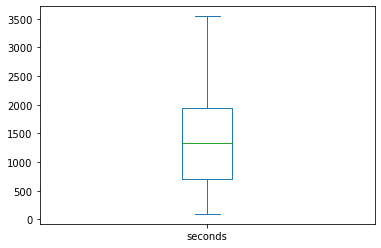

In [24]:
df.iloc[:,4].plot.box()

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of ticklabels (1).

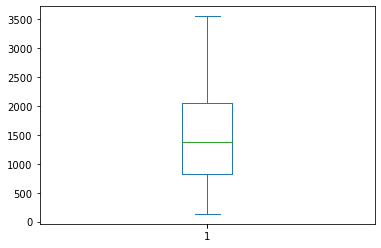

In [25]:
for (i, col) in enumerate(cols):
    if (df.iloc[:,i].dtype != 'O'):
        df.iloc[:,5].plot.box()